# Task 3

<i>Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.</i>

## About the dataset:

**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).**


| Variable Name | Role    | Type        | Demographic      | Description                                                                                                                                       | Units |
|---------------|---------|-------------|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|-------|
| age           | Feature | Integer     | Age              |                                                                                                                                                   |       |
| job           | Feature | Categorical | Occupation       | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |       |
| marital       | Feature | Categorical | Marital Status   | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                  |       |
| education     | Feature | Categorical | Education Level  | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                      |       |
| default       | Feature | Binary      |                  | has credit in default?                                                                                                                             |       |
| balance       | Feature | Integer     |                  | average yearly balance                                                                                                                             | euros |
| housing       | Feature | Binary      |                  | has housing loan?                                                                                                                                  |       |
| loan          | Feature | Binary      |                  | has personal loan?                                                                                                                                 |       |
| contact       | Feature | Categorical |                  | contact communication type (categorical: 'cellular','telephone')                                                                                   |       |
| day_of_week   | Feature | Date        |                  | last contact day of the week                                                                                                                       |       |
| month         | Feature | Date        |                  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                   |       |
| duration      | Feature | Integer     |                  | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |       |
| campaign      | Feature | Integer     |                  | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                              |       |
| pdays         | Feature | Integer     |                  | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)  |       |
| previous      | Feature | Integer     |                  | number of contacts performed before this campaign and for this client                                                                              |       |
| poutcome      | Feature | Categorical |                  | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                        |       |
| y             | Target  | Binary      |                  | has the client subscribed a term deposit?                                                                                                          |       |


##  Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the dataset

In [4]:
df = pd.read_csv("bank-additional.csv",delimiter=';')

In [5]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
df.rename(columns={'y':'subscribed_deposit'}, inplace=True)

## Details about the dataset

In [7]:
df.shape

(4119, 21)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed_deposit'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4119 non-null   int64  
 1   job                 4119 non-null   object 
 2   marital             4119 non-null   object 
 3   education           4119 non-null   object 
 4   default             4119 non-null   object 
 5   housing             4119 non-null   object 
 6   loan                4119 non-null   object 
 7   contact             4119 non-null   object 
 8   month               4119 non-null   object 
 9   day_of_week         4119 non-null   object 
 10  duration            4119 non-null   int64  
 11  campaign            4119 non-null   int64  
 12  pdays               4119 non-null   int64  
 13  previous            4119 non-null   int64  
 14  poutcome            4119 non-null   object 
 15  emp.var.rate        4119 non-null   float64
 16  cons.p

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking for null/missing values in the dataset

In [11]:
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

`Observation & Inference:`
- No missing values present

## Checking for duplicate values in the dataset

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

`Observation & Inference:`
- All the duplicate values are removed

## Visualizing numerical columns using histogram

In [15]:
df_obj= df.select_dtypes(include='object').columns

df_num= df.select_dtypes(exclude='object').columns


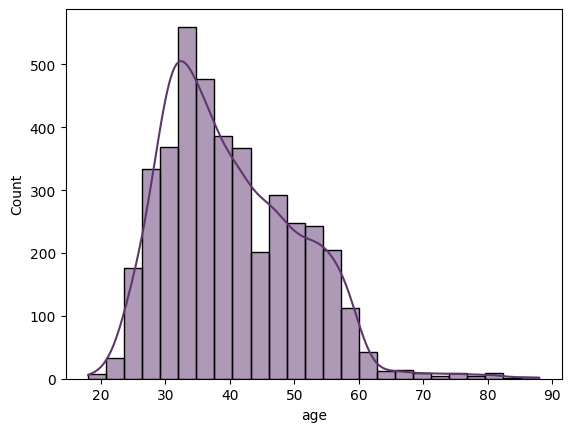

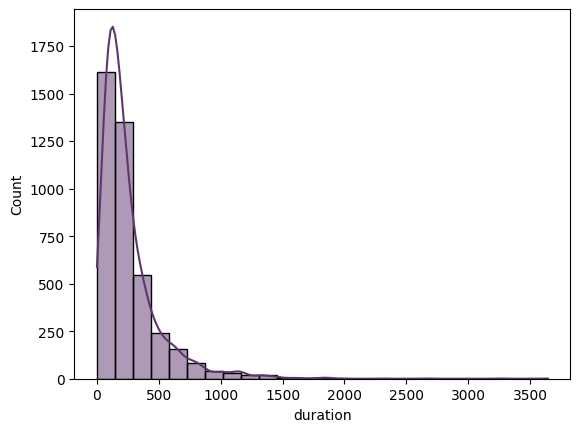

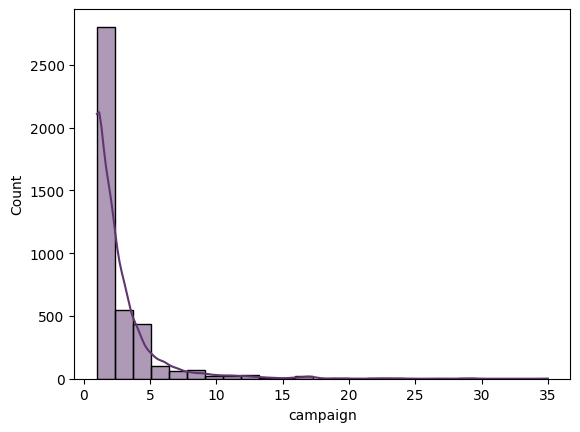

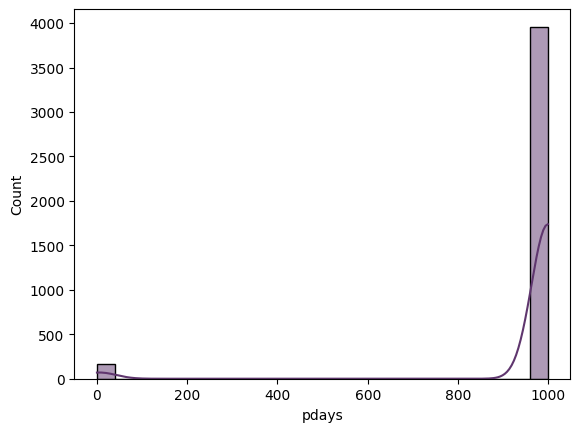

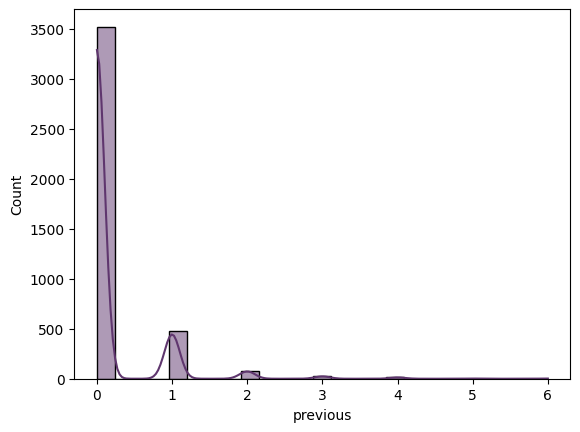

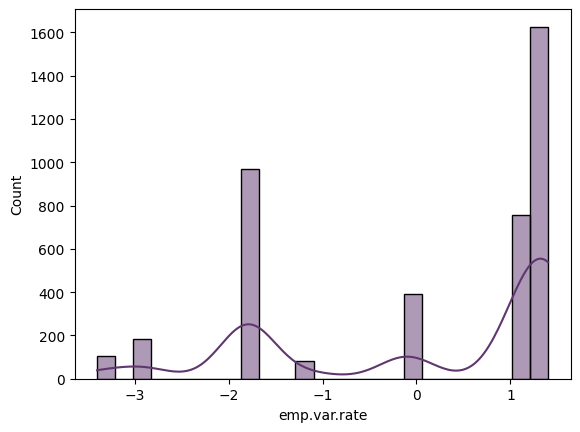

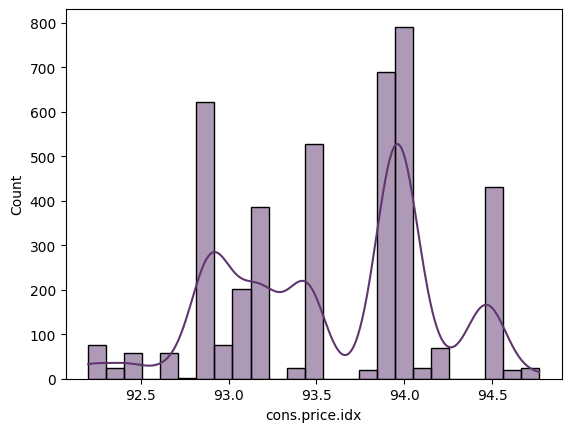

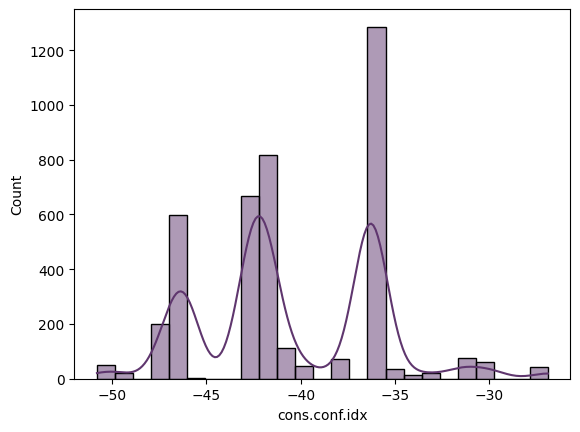

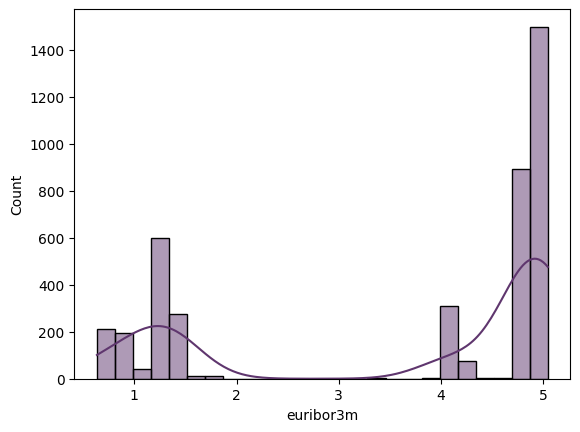

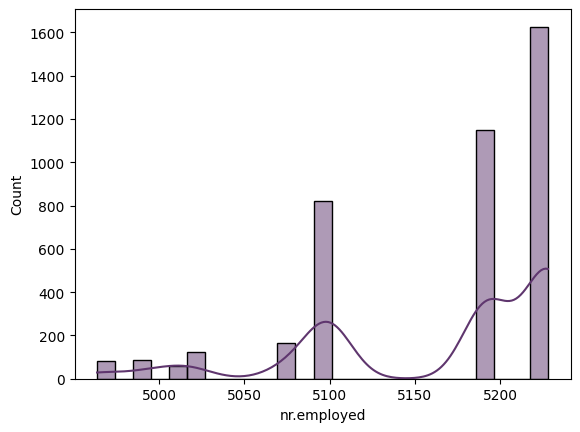

In [16]:
for feature in df_num:
    sns.histplot(x=feature,data=df,bins=25,kde=True,color='#5f366e')
    plt.show()

## Visualizing categorical columns using bar graphs


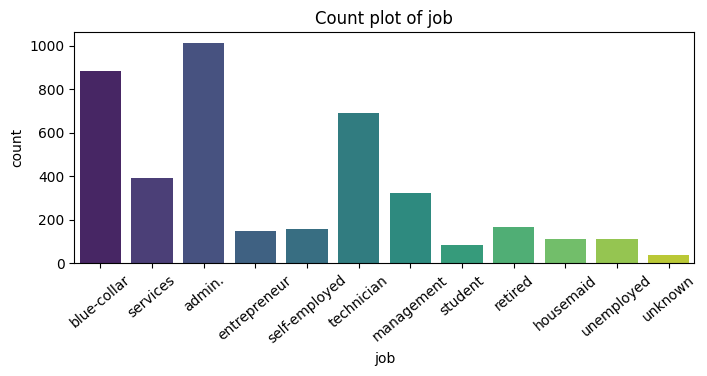

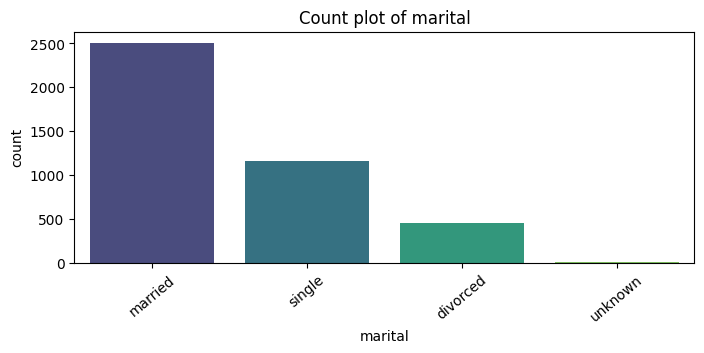

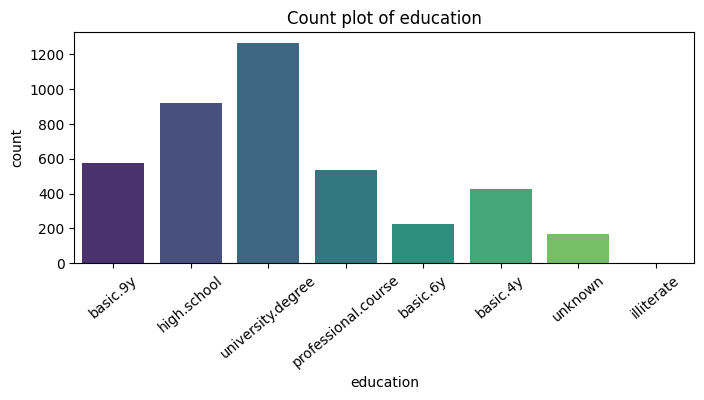

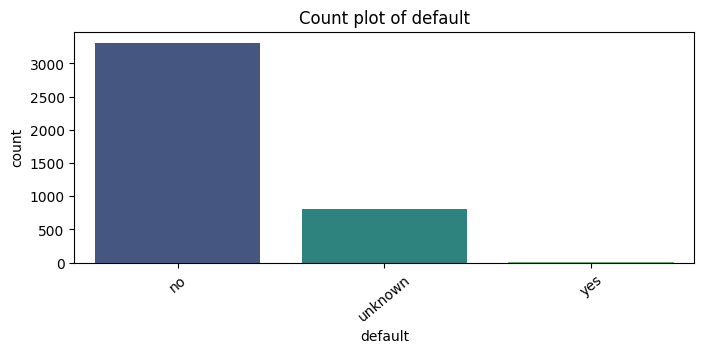

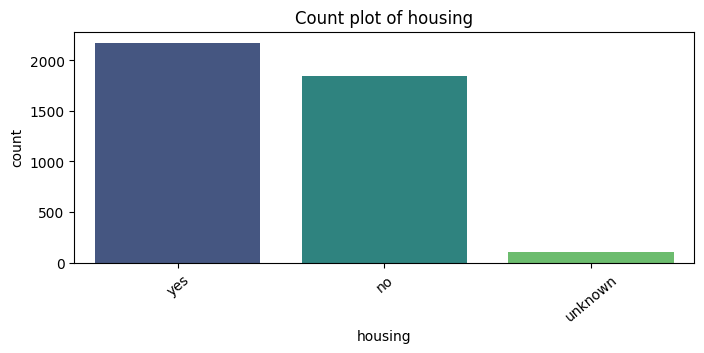

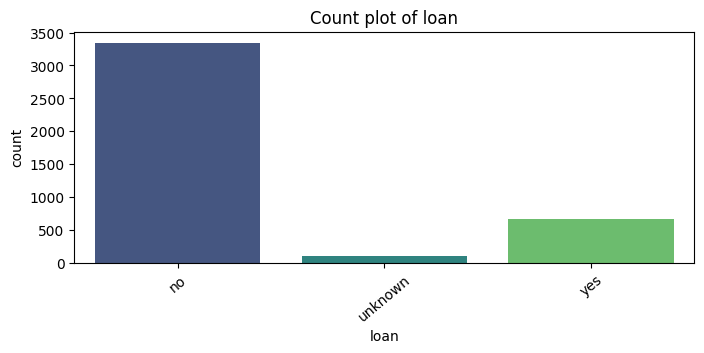

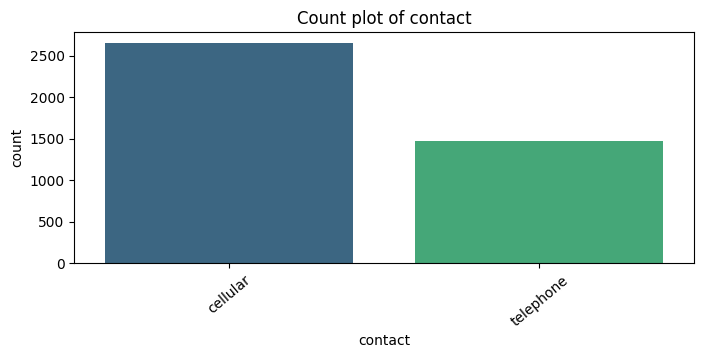

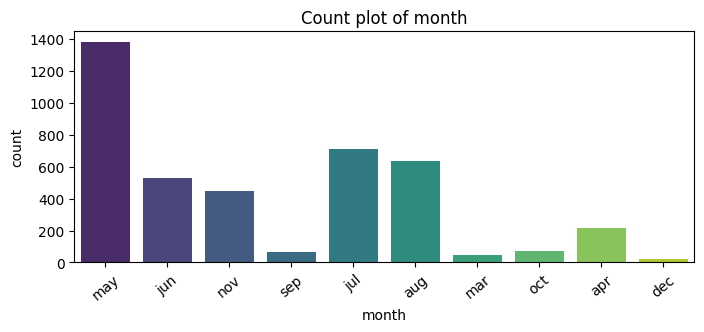

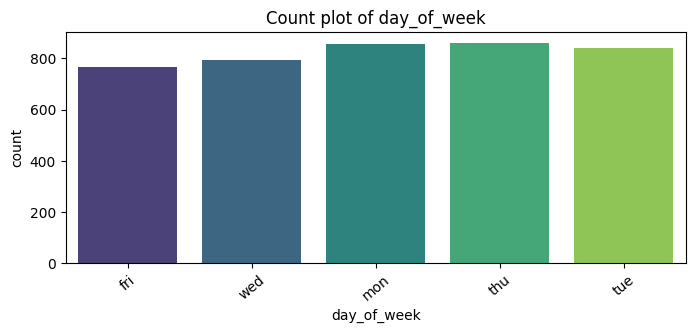

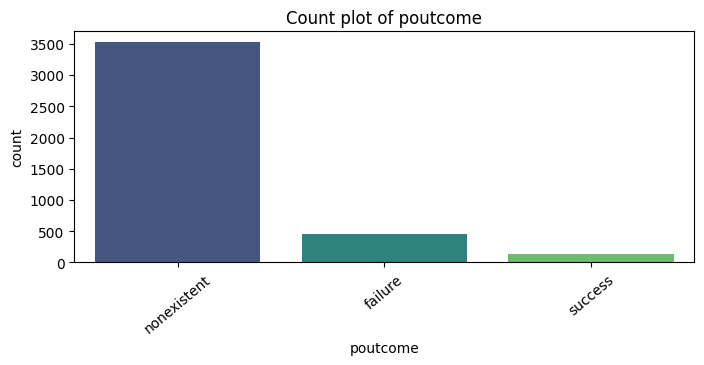

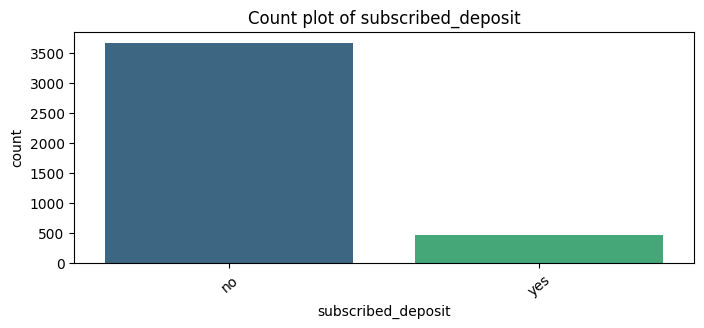

In [17]:
for feature in df_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

`Observations & Insights:`

- In the Job Column, we have seen most of the clients are working as 'admin'.

- In the marital Column, we have seen most of the clients are married.

- In the education Column, we have seen most of the clients are having 'university.degree' as education.

- In the default Column, we have seen most of the clients are having 'no' credit as default.

- In the housing Column, we have seen most of the clients are taking housing loan.

- In the loan Column, we have seen most of the clients are not taking personal loan.

- In the contact Column, we have seen most of the clients are choosen cellular as contact.

- In the month Column, we have seen most of the clients are contacted in the 'may' month.

- In the day_of_week Column, we have seen most of the clients are contacted in 'thursday'.

- In the poutcome Column, we have seen the result of most of the previous market campaign is 'nonexistent'.

- In the target column , we have seen most of the clients are not subscribed a term deposit.

## checking for outliers

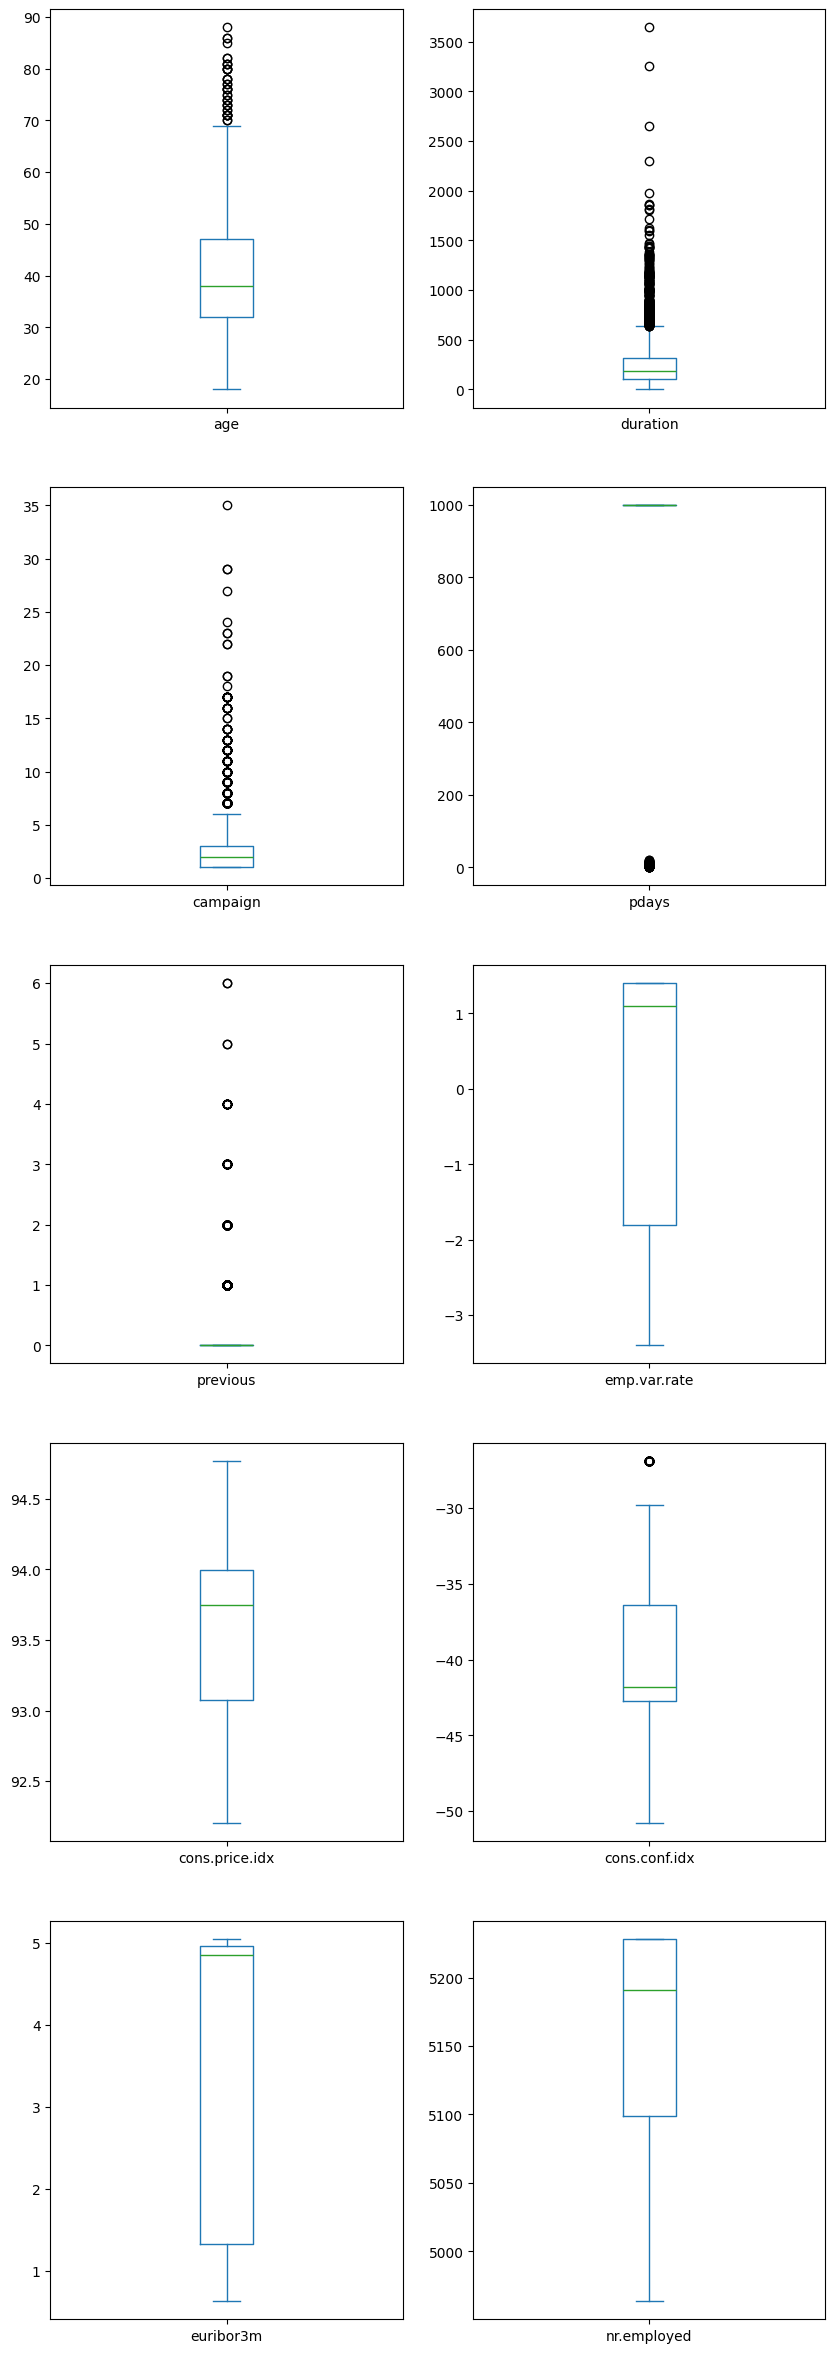

In [18]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

## Outlier treatment

In [19]:

columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the DataFrame for the current column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



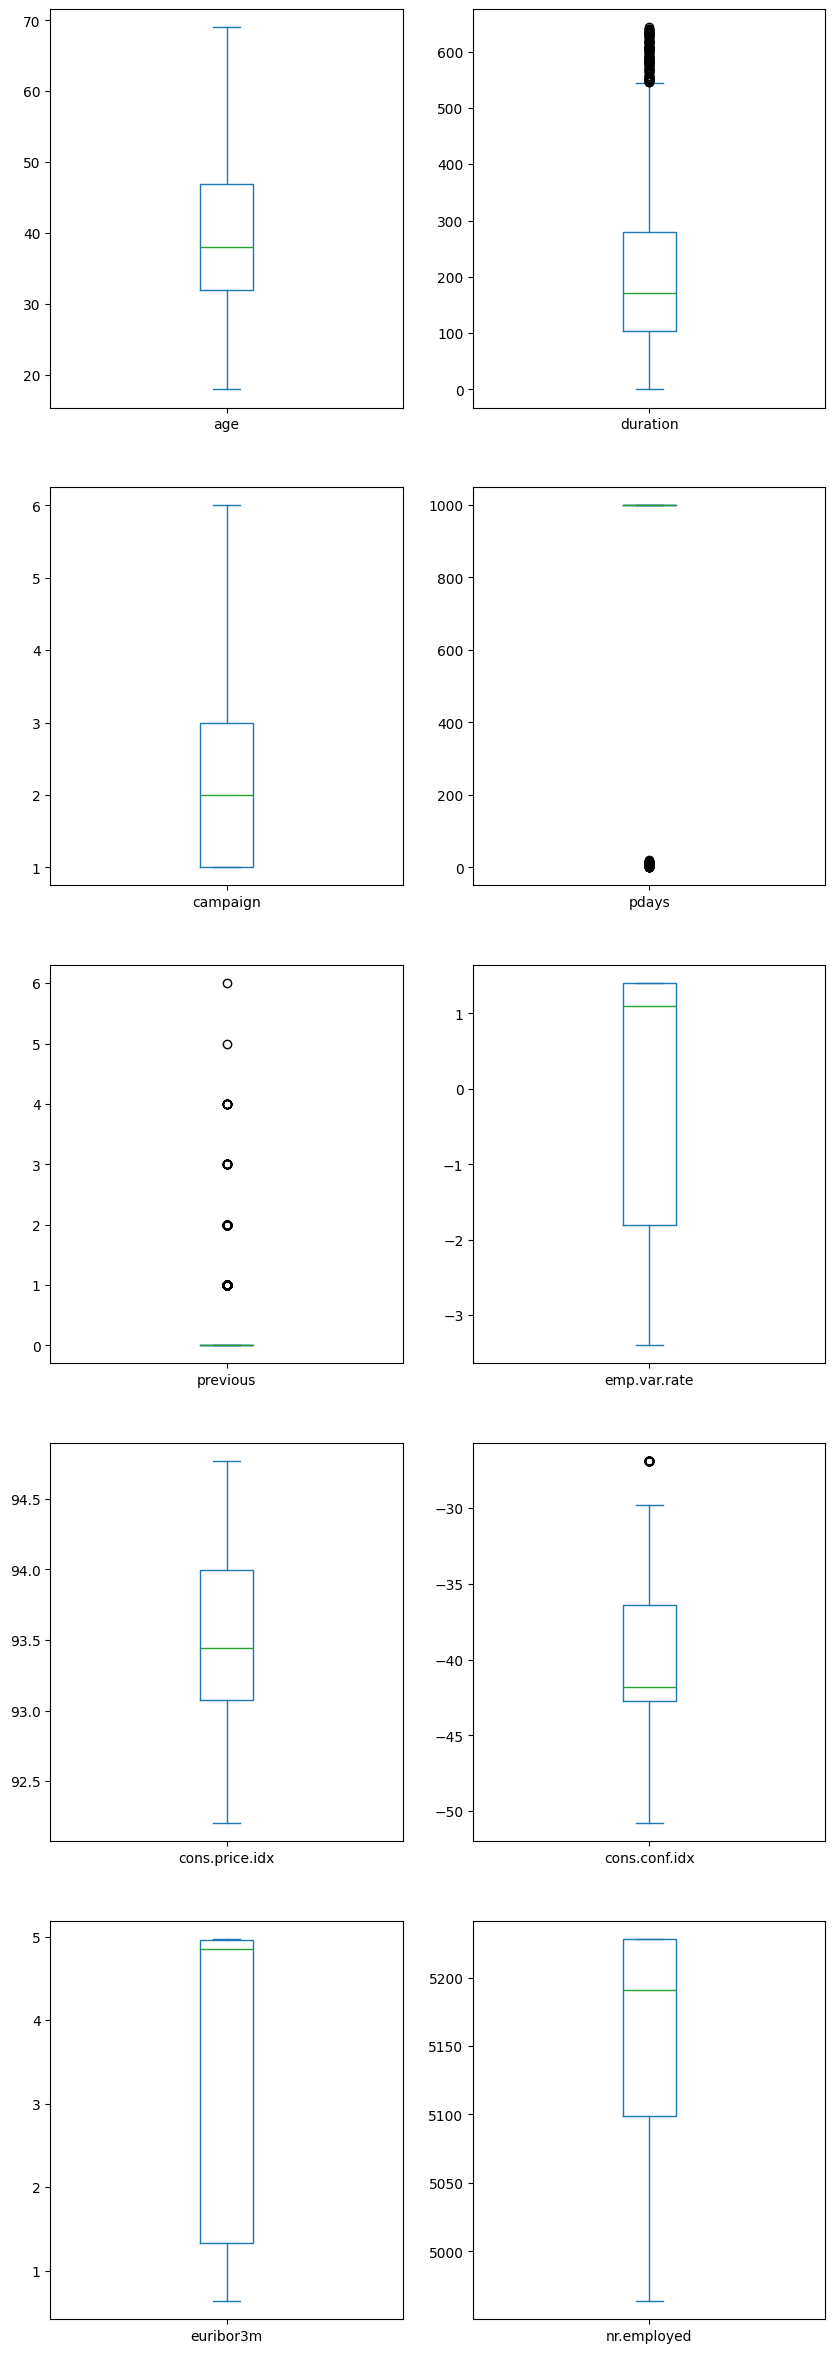

In [20]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

## Checking for correlation using heatmap

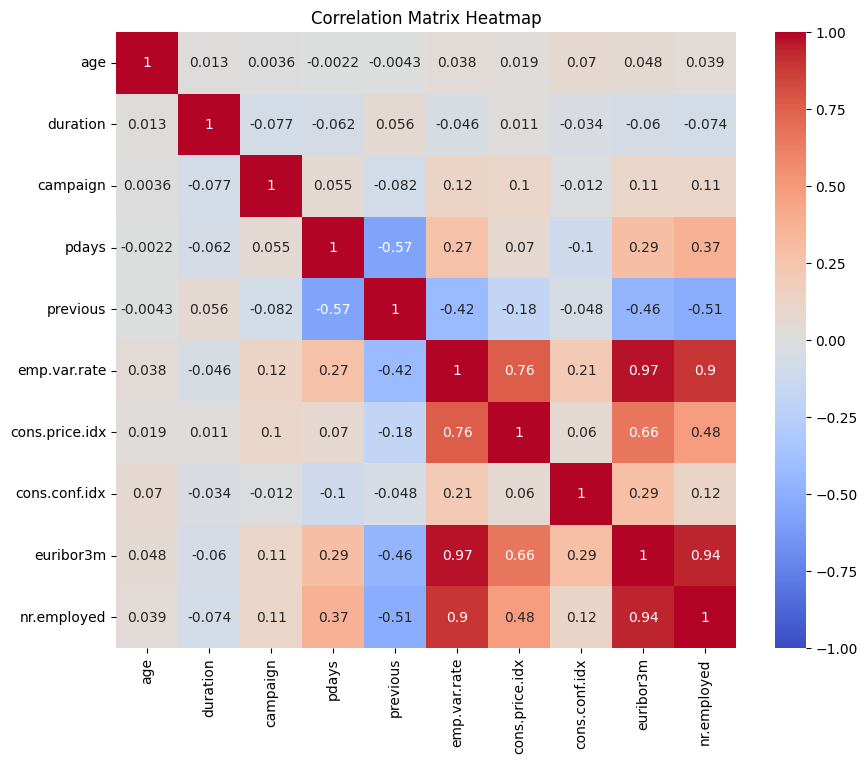

In [21]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [23]:
# copy the original dataframe

df1=df.copy()

# Removing high correlated columns from the dataset
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'subscribed_deposit'],
      dtype='object')

## showing dimensions of the updated dataset

In [24]:
df1.shape

(3573, 18)

## Conversion of categorical columns into numerical columns using label encoder.

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df1.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,subscribed_deposit
0,12,1,1,2,0,2,0,0,6,0,474,1,18,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,343,3,18,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,18,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,18,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,18,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,18,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,18,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,18,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,509,0,18,0,1,13,17,0


## Checking the target variable

In [26]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)*100

subscribed_deposit
0    92.219423
1     7.780577
Name: proportion, dtype: float64

In [27]:
## independent variables
x = df_encoded.iloc[:,:-1]   

## Target variable
y = df_encoded.iloc[:,-1]     


In [28]:
x.shape

(3573, 17)

In [29]:
y.shape

(3573,)

## Splitting the dataset into train and test datasets

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2501, 17)
(1072, 17)
(2501,)
(1072,)


## Decision Tree classifier

### using 'gini' criterion

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

## Evaluating Training and Testing Accuracy

In [33]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9488204718112755
Testing accuracy: 0.9225746268656716


In [34]:
y_pred=dc.predict(x_test)

## Evaluating Prediction Accuracy

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9225746268656716


In [36]:
print(confusion_matrix(y_test,y_pred))

[[965  18]
 [ 65  24]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       983
           1       0.57      0.27      0.37        89

    accuracy                           0.92      1072
   macro avg       0.75      0.63      0.66      1072
weighted avg       0.91      0.92      0.91      1072



# Plot Decision Tree

In [38]:
from sklearn.tree import plot_tree

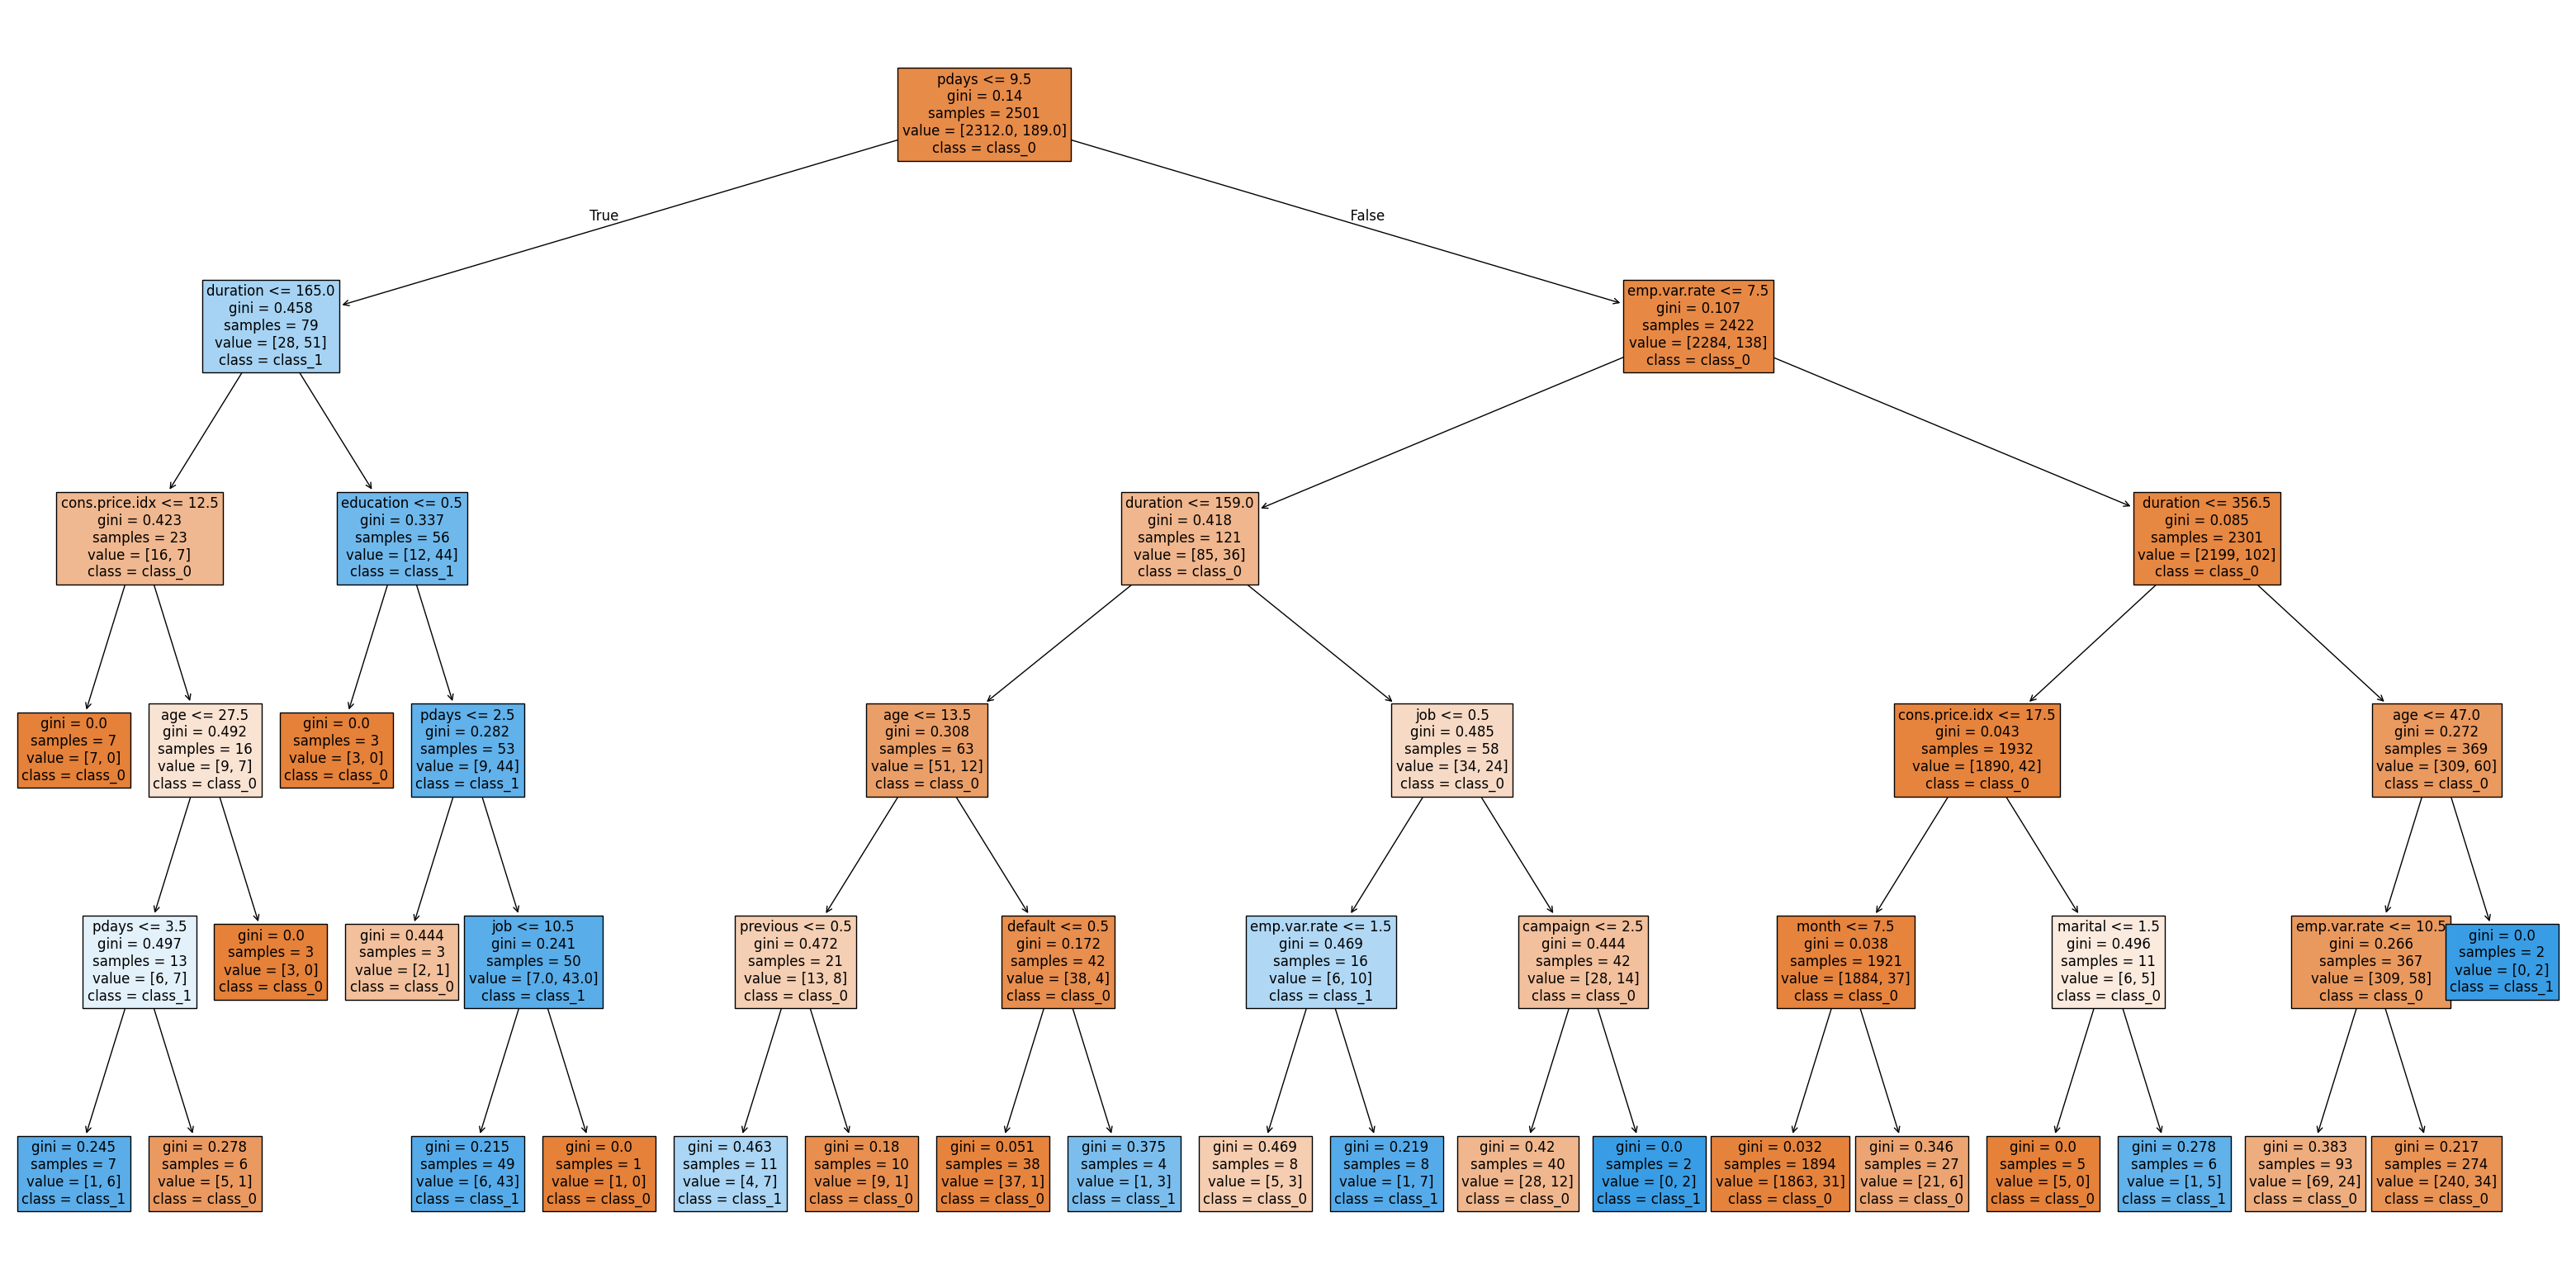

In [39]:
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

## Decision Tree classifier

### using 'entropy' criterion

In [40]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

## Evaluating Training and Testing Accuracy

In [41]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9472211115553778
Testing accuracy: 0.9272388059701493


In [42]:
y1_pred=dc1.predict(x_test)

## Evaluating Prediction Accuracy

In [43]:
print(accuracy_score(y_test,y1_pred))

0.9272388059701493


In [44]:
print(confusion_matrix(y_test,y1_pred))

[[970  13]
 [ 65  24]]


In [45]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       983
           1       0.65      0.27      0.38        89

    accuracy                           0.93      1072
   macro avg       0.79      0.63      0.67      1072
weighted avg       0.91      0.93      0.91      1072



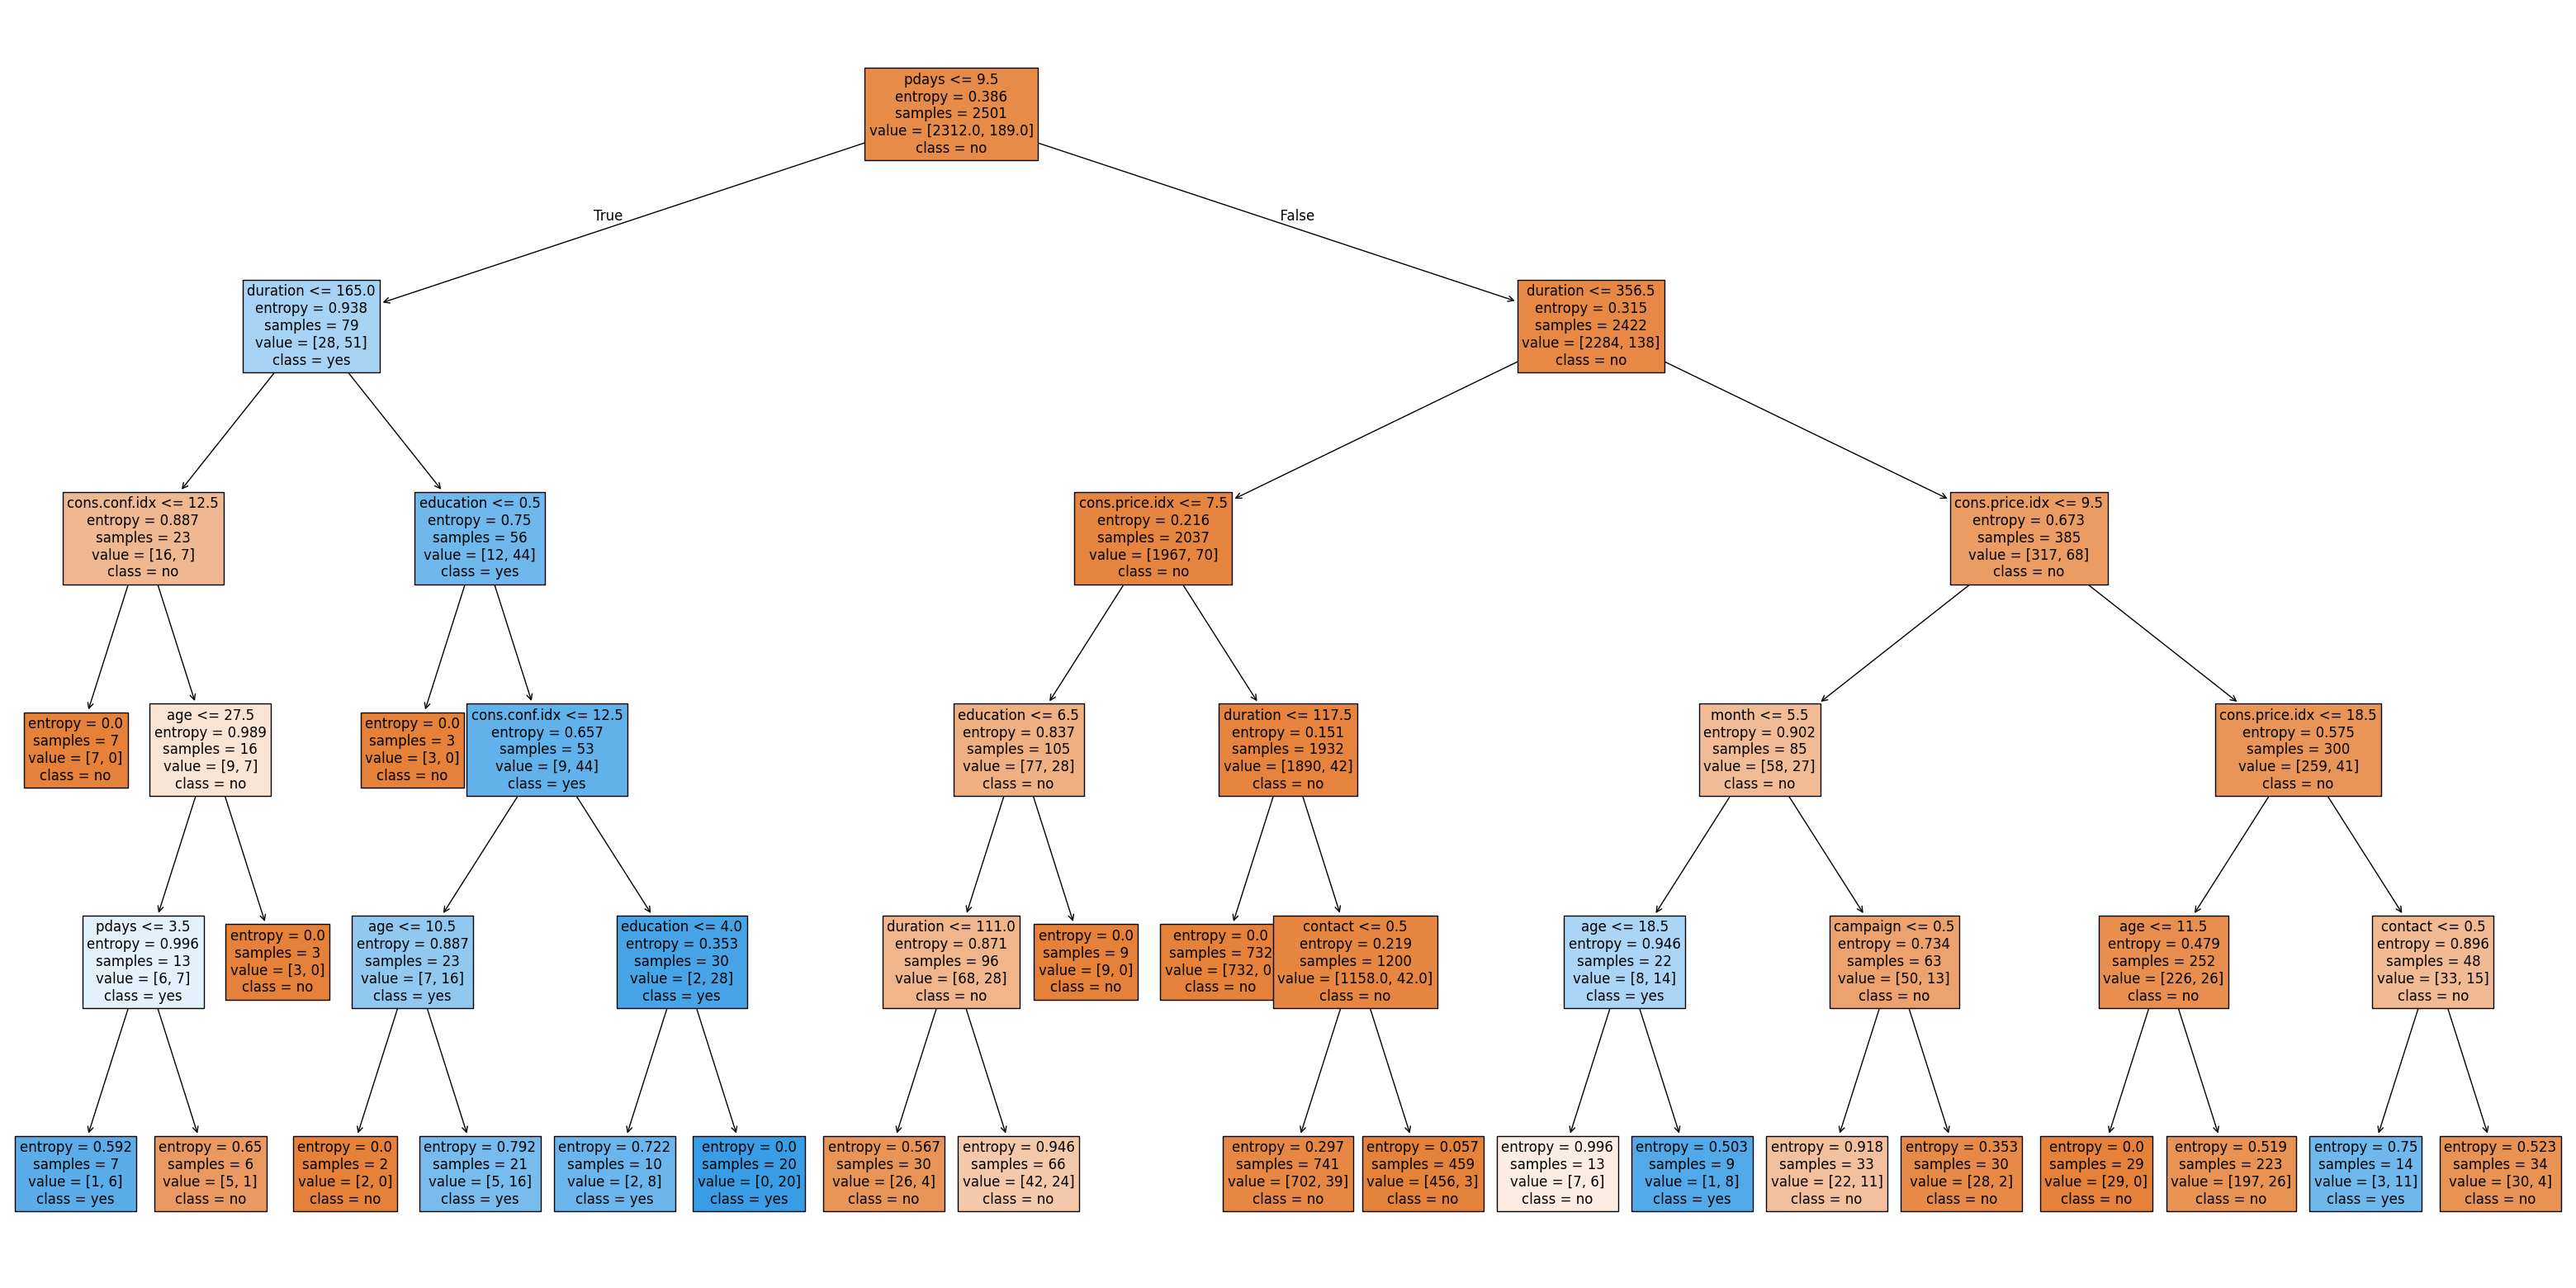

In [46]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()

## `Final Conclusion`

- **High Accuracy for Both Criteria:** Both the Gini impurity and entropy criteria provide high accuracy for training and testing, with training accuracies around 93.6% and testing accuracies around 93.3% for Gini and 93.2% for entropy.
  


- **Performance Metrics Comparison:**
  - The Gini criterion has a slightly higher testing accuracy and a better recall for the positive class (1), indicating it is better at identifying true positive instances.
  - The entropy criterion results in fewer false positives but more false negatives compared to Gini.
